In [1]:
import os
import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import plotly.express as px
import h5py

In [2]:
PATH_VOLUMES="BraTS2020_training_data/content/data/"

volume_list=os.listdir(PATH_VOLUMES)

In [3]:
df=pd.read_csv("BraTS20 Training Metadata.csv")
df.head()

,slice_path,target,volume,slice,label0_pxl_cnt,label1_pxl_cnt,label2_pxl_cnt,background_ratio
0,../input/brats2020-training-data/BraTS2020_tra...,0,41,0,0,0,0,1.0
1,../input/brats2020-training-data/BraTS2020_tra...,0,41,1,0,0,0,1.0
2,../input/brats2020-training-data/BraTS2020_tra...,0,41,2,0,0,0,1.0
3,../input/brats2020-training-data/BraTS2020_tra...,0,41,3,0,0,0,1.0
4,../input/brats2020-training-data/BraTS2020_tra...,0,41,4,0,0,0,1.0


In [4]:
df.slice_path=df.slice_path.apply(lambda x: x.replace("../input/brats2020-training-data/",""))
df.head()

,slice_path,target,volume,slice,label0_pxl_cnt,label1_pxl_cnt,label2_pxl_cnt,background_ratio
0,BraTS2020_training_data/content/data/volume_41...,0,41,0,0,0,0,1.0
1,BraTS2020_training_data/content/data/volume_41...,0,41,1,0,0,0,1.0
2,BraTS2020_training_data/content/data/volume_41...,0,41,2,0,0,0,1.0
3,BraTS2020_training_data/content/data/volume_41...,0,41,3,0,0,0,1.0
4,BraTS2020_training_data/content/data/volume_41...,0,41,4,0,0,0,1.0


In [5]:
df.volume.nunique()

369

In [6]:
df.volume.unique()

array([ 41, 185, 135, 306,  40, 140, 359, 310, 249,  95, 235, 286,  28,
       159, 275, 251, 265, 190,   9, 325, 155,  64, 291, 319, 264, 358,
       122,  50, 278, 214,  82, 193, 169,  88, 352, 323, 299,  92,   2,
       163, 341, 124,  56, 314, 315,   7, 100, 107, 259,  26,  33, 168,
       326, 238, 295,  23,  29,  37, 246, 228, 297,   1, 156, 129, 236,
       307, 173,  27, 274, 149, 172, 254,  25,  83,  15,  93,  63, 354,
       322, 229, 151, 105,  17, 188, 148, 234, 113, 125, 115,  70,  32,
       348, 342, 240, 260, 206,  55, 131, 130,  96,  39, 154, 121, 177,
       139, 106, 153, 288, 143, 227, 186, 294, 343, 237, 119, 120,  20,
       304, 300, 179, 182, 202,  11,  81, 134,  42, 152, 331, 141, 313,
       329, 293, 276, 195, 281, 167,  13, 262,  51, 302, 273, 285,  91,
       339,  30, 111, 337, 318, 197, 175, 165,  52, 361, 316,  99,  35,
       180, 123, 174, 145,  45,  46, 346, 209, 114, 349, 219,  78, 324,
       267,  43,  77, 116, 340, 261, 118,  18,  86, 204, 187, 28

In [7]:
df.groupby("volume").slice.nunique().nunique()

1

In [82]:
def get_slice(path):
    hf=h5py.File(path, 'r')
    data = hf.get('image').value # `data` is now an ndarray.
    mask = hf.get('mask').value
    
    return (data, mask)

data, mask=get_slice(df.loc[100].slice_path)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.


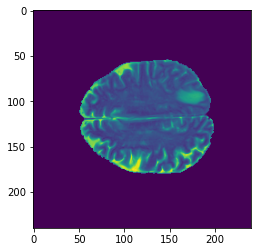

In [10]:
plt.imshow(data[:,:,3])#.shape

In [11]:
df.query("volume==1")

,slice_path,target,volume,slice,label0_pxl_cnt,label1_pxl_cnt,label2_pxl_cnt,background_ratio
9455,BraTS2020_training_data/content/data/volume_1_...,0,1,0,0,0,0,1.0
9456,BraTS2020_training_data/content/data/volume_1_...,0,1,1,0,0,0,1.0
9457,BraTS2020_training_data/content/data/volume_1_...,0,1,2,0,0,0,1.0
9458,BraTS2020_training_data/content/data/volume_1_...,0,1,3,0,0,0,1.0
9459,BraTS2020_training_data/content/data/volume_1_...,0,1,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...
9605,BraTS2020_training_data/content/data/volume_1_...,0,1,150,0,0,0,1.0
9606,BraTS2020_training_data/content/data/volume_1_...,0,1,151,0,0,0,1.0
9607,BraTS2020_training_data/content/data/volume_1_...,0,1,152,0,0,0,1.0
9608,BraTS2020_training_data/content/data/volume_1_...,0,1,153,0,0,0,1.0


In [77]:
dict_seqs={"T1":0,"T1Gd":1,"T2":2,"T2-FLAIR":3}

def get_slice_seq(path, seq=None):
    data,mask=get_slice(path)
    if seq:
        return data[:,:,dict_seqs[seq]]
    return data


def get_sequence_volume(volume,sequence=None):
    df_plot=df.query(f"volume=={volume}")
    slices=np.stack(df_plot.sort_values("slice").slice_path.apply(get_slice_seq,args=(sequence,)),axis=-1)
    return slices

def get_mask_seq(path):
    data,mask=get_slice(path)
    return mask

def get_sequence_mask(volume):
    df_plot=df.query(f"volume=={volume}")
    slices=np.stack(df_plot.sort_values("slice").slice_path.apply(get_mask_seq),axis=-1)
    return slices


volume_num=4
data_volume=get_sequence_volume(volume_num)
data_mask=get_sequence_mask(volume_num)
    
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys


/opt/conda/lib/python3.7/site-packages/matplotlib/image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/opt/conda/lib/python3.7/site-packages/matplotlib/image.py:480: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([vmin, vmax], dtype=scaled_dtype)


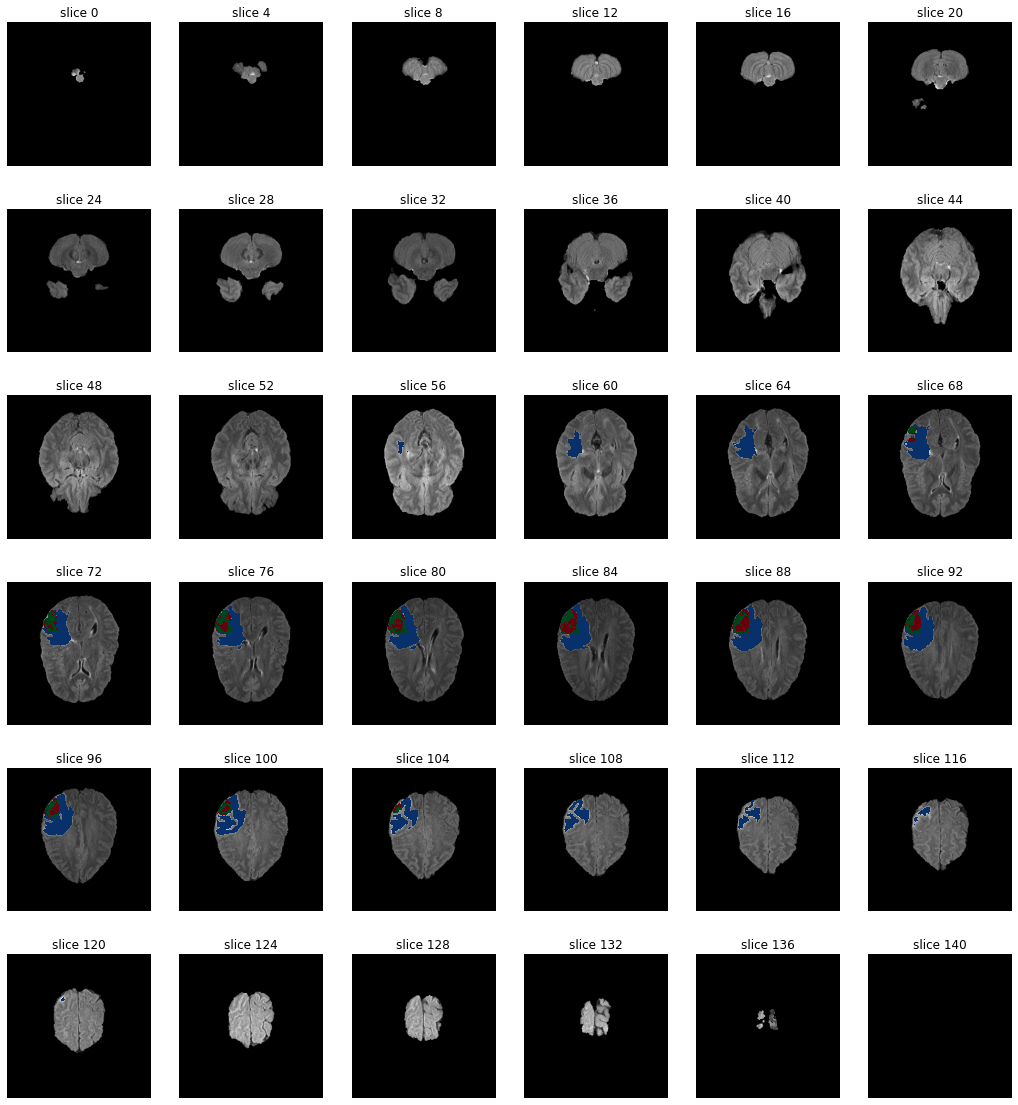

In [79]:
def plot_mri_flat(volume, mask, sequence="T1",nrow=6, ncol=6, start=0, step=4,axis="z"):
    fig,ax = plt.subplots(nrow,ncol,figsize=[18,20])
    cmap_0 = copy.copy(plt.cm.get_cmap('Reds')) # get a copy of the gray color map
    cmap_0.set_bad(alpha=0) # set how the colormap handles 'bad' values
    cmap_1 = copy.copy(plt.cm.get_cmap('Blues')) # get a copy of the gray color map
    cmap_1.set_bad(alpha=0) # set how the colormap handles 'bad' values
    cmap_2 = copy.copy(plt.cm.get_cmap('Greens')) # get a copy of the gray color map
    cmap_2.set_bad(alpha=0) # set how the colormap handles 'bad' values
    
    dict_colors={0:cmap_0, 
                 1:cmap_1, 
                 2:cmap_2}
    
    mask_plot = mask.astype(float)#mask[:,:,k,:].astype(float)
    mask_plot[mask_plot==0] = np.nan
    
    for i in range(nrow):
        for j in range(ncol):
            index = (j + i*ncol)*step #* step
            ax[i,j].set_title(f'slice {index}')
            if axis=="x":
                ax[i,j].imshow(np.rot90(volume[index,:,dict_seqs[sequence],:],3),cmap='gray')
                for k in range(mask.shape[2]):
                    ax[i,j].imshow(np.rot90(mask_plot[index,:,k,:],3), cmap=dict_colors[k], interpolation = 'none', origin='lower', vmin = 0)
            elif axis=="y":
                ax[i,j].imshow(np.rot90(volume[:,index,dict_seqs[sequence],:],3),cmap='gray')
                for k in range(mask.shape[2]):
                    ax[i,j].imshow(np.rot90(mask_plot[:,index,k,:],3), cmap=dict_colors[k], interpolation = 'none', origin='lower', vmin = 0)
            else:
                ax[i,j].imshow(np.rot90(volume[:,:,dict_seqs[sequence],index],3),cmap='gray')
                for k in range(mask.shape[2]):
                    ax[i,j].imshow(np.rot90(mask_plot[:,:,k,index],3), cmap=dict_colors[k], interpolation = 'none', origin='lower', vmin = 0)
            ax[i,j].axis('off')
    plt.show()

plot_mri_flat(data_volume,data_mask,axis="z")

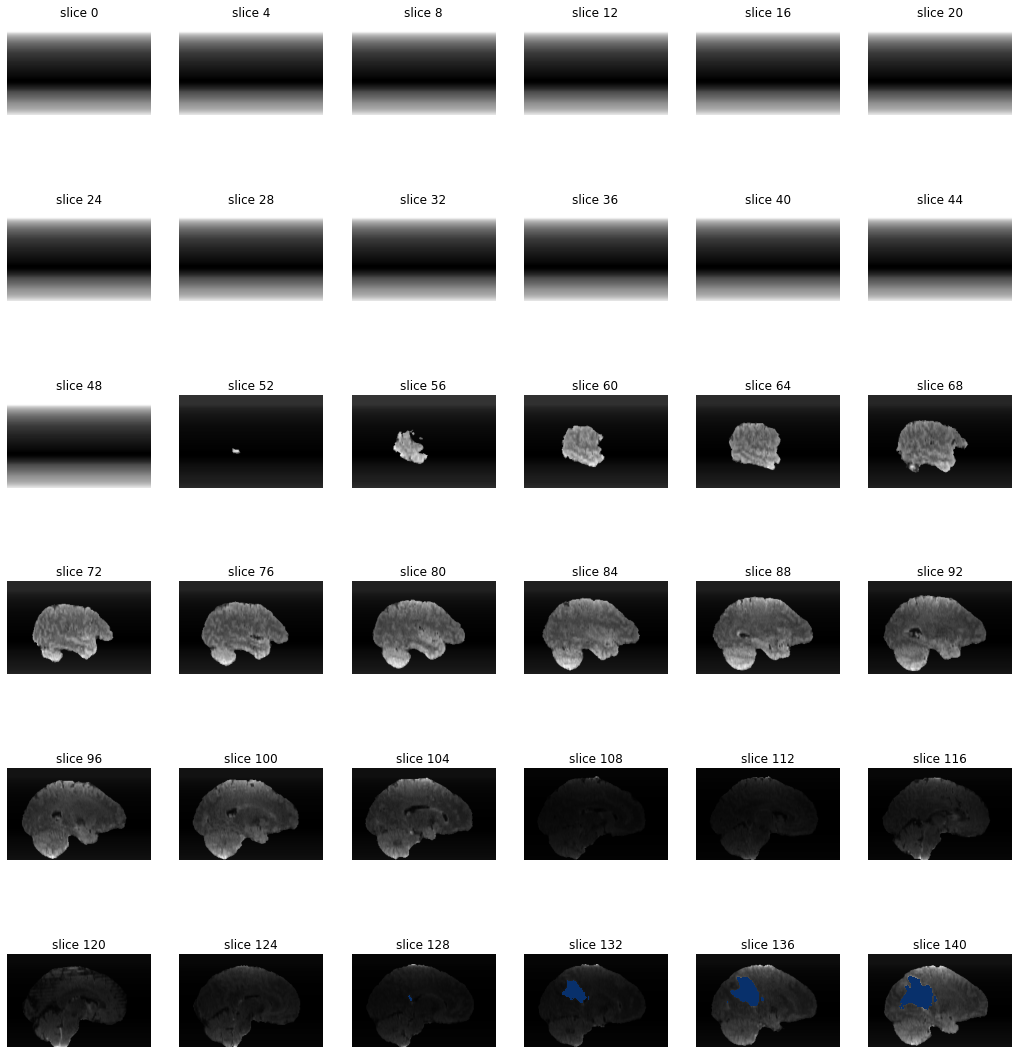

In [80]:
plot_mri_flat(data_volume,data_mask,axis="x")

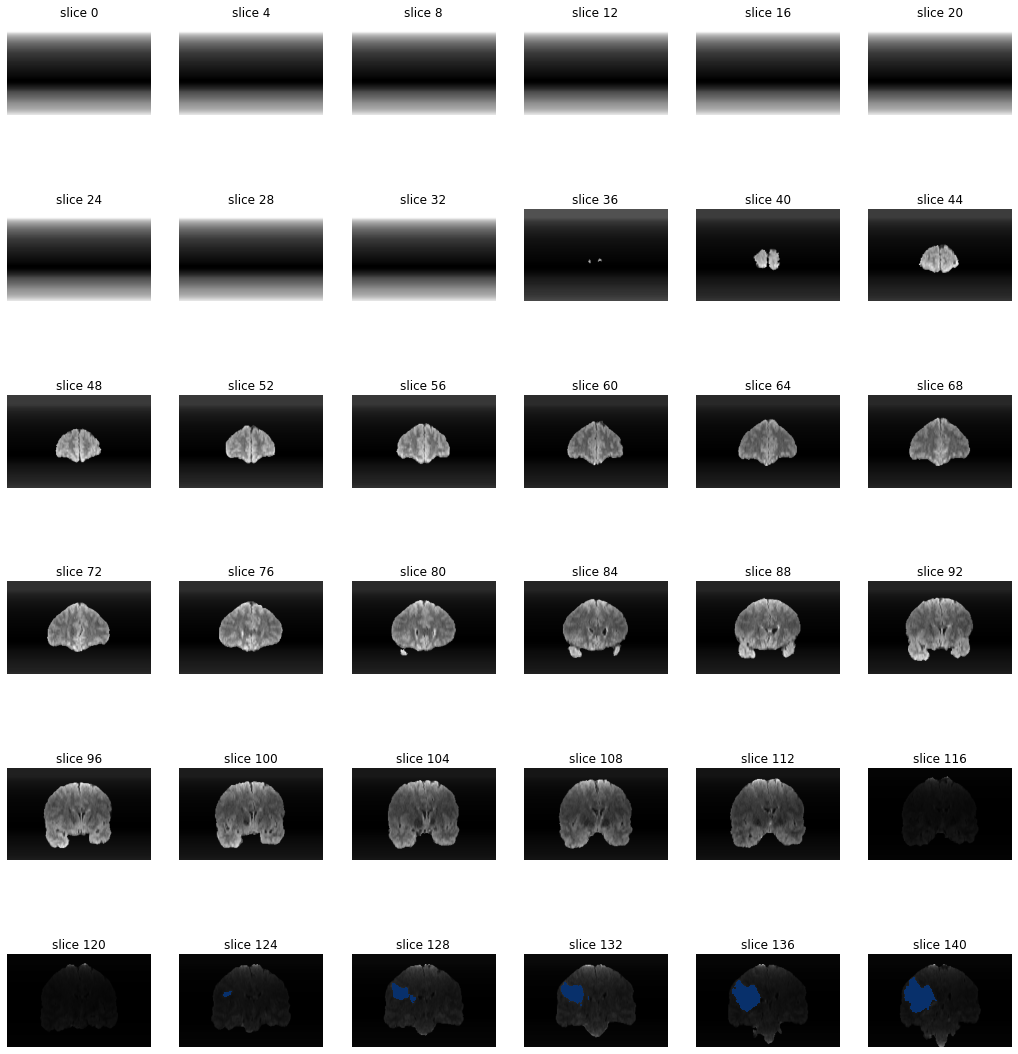

In [81]:
plot_mri_flat(data_volume,data_mask,axis="y")